In [49]:
import os

json_pairs = []
cleaned_files = []

def group_files(files):
    file_dict = {}
    for file, extn in files:
        if file in file_dict:
            file_dict[file].append(file+extn)
        else:
            file_dict[file] = [file+extn]
    return [tuple(values) for _, values in file_dict.items()]

# add tupeles of matching filename jsons to json_pairs
for file in os.listdir('jsons'):
    if file.endswith("_pathdata.json"):
        file = (file[:-14], file[-14:])
    elif file.endswith("-0_metadata.json"):
        file = (file[:-16], file[-16:])
    cleaned_files.append(file)

# pick out pairs from cleaned_files
cleaned_files = [file for file in cleaned_files if type(file) == tuple]

json_pairs = group_files(cleaned_files)

In [54]:
import json
import numpy as np
import matplotlib.pyplot as plt

def test_valid_pairs(json_pairs):
    for pair in json_pairs:
        f = open(f"jsons/{pair[0]}")
        metadata = json.load(f)
        f2 = open(f"jsons/{pair[1]}")
        pathdata = json.load(f2)

        alldata = pathdata
        for key in metadata:
            alldata[key] = metadata[key]

        try:
            lat_long = np.array(list(map(lambda x: (x['GARAnchorUUID'], x['longitude'], x['latitude'], x['geoAnchorTransform']), alldata['savedRouteGeospatialLocations'])), dtype=object)
            gar_anchors = np.array(list(map(lambda x: (x['identifier'], x['transform']), alldata['garAnchors'][-1])), dtype=object)

            # filter and sort gar_anchors to match corresponding ID for lat_long points
            gar_anchors_filtered = []
            for x in lat_long:
                for y in gar_anchors:
                    if x[0] == y[0]:  # if IDs match
                        gar_anchors_filtered.append(y)
            print(len(gar_anchors_filtered))
        
        except KeyError:
            print(f"KeyError: {pair[0]}")
            continue

test_valid_pairs(json_pairs)
f = open('2E8519AA-4E63-4B9E-9D4E-05F7AFA202872023-03-03T09:51:12-05:00-0_metadata.json')
metadata = json.load(f)
f2 = open('2E8519AA-4E63-4B9E-9D4E-05F7AFA202872023-03-03T09:51:12-05:00_pathdata.json')
pathdata = json.load(f2)

alldata = pathdata
for key in metadata:
    alldata[key] = metadata[key]

0
0
0
0
KeyError: 108C8801-4272-49AA-BDC7-08D3DACDBEB62022-08-19T13:46:09-04:00-0_metadata.json
0
0
0
0
0
0
0
0
0
0
0
0


## Cloud Anchors

Here are the cloud anchors we would use to do alignment.

In [2]:
cloud_anchors_for_alignment = alldata['cloudAnchorsForAlignment']
print(cloud_anchors_for_alignment)

[{'anchorIdentifier': 'BAD746EF-9A4D-4A55-939D-0A56FD87FDF7', 'cloudAnchorID': 'ua-06ce32db18664d2edb7e4e34e74996dd', 'anchorTransform': [-0.697699248790741, 7.523176748236438e-09, -0.7163907885551453, 0, 2.6671980180026367e-09, 1, 7.903890875127217e-09, 0, 0.7163907885551453, 3.6037823836210237e-09, -0.697699248790741, 0, 0.2449275553226471, 0.057402439415454865, 0.22862039506435394, 1]}, {'anchorTransform': [-0.4988815188407898, -1.1417586875950292e-08, 0.8666701912879944, 0, -9.629907538055704e-08, 1, -4.225856997663868e-08, 0, -0.8666701912879944, -1.045415558564855e-07, -0.4988815188407898, 0, -11.93743896484375, -0.20666222274303436, -5.221015453338623, 1], 'anchorIdentifier': '52F7318E-B0CA-4240-A0B4-A7EEDC86DC79', 'cloudAnchorID': 'ua-5821c2b05e0931485805813de97aa696'}]


In [3]:
import numpy as np

cloudAnchorTransforms = np.array(list(map(lambda x: np.array(x['anchorTransform']).reshape((4,4)).T, cloud_anchors_for_alignment)))
print("cloud anchor 1 position", cloudAnchorTransforms[0,:-1,-1])
print("cloud anchor 2 position", cloudAnchorTransforms[1,:-1,-1])

cloud anchor 1 position [0.24492756 0.05740244 0.2286204 ]
cloud anchor 2 position [-11.93743896  -0.20666222  -5.22101545]


## Geospatial Anchors

Here is how we would use geospatial alignment

[[ 42.29354138 -71.26396228]
 [ 42.29354195 -71.26396232]
 [ 42.29354211 -71.26396241]
 [ 42.29354194 -71.26396262]
 [ 42.29354167 -71.26396277]
 [ 42.29354185 -71.26396268]
 [ 42.29354185 -71.26396263]
 [ 42.2935418  -71.26396267]
 [ 42.29354116 -71.26396311]
 [ 42.29353818 -71.26396334]
 [ 42.29353372 -71.26396399]
 [ 42.2935291  -71.26396665]
 [ 42.29352441 -71.26396884]
 [ 42.29351933 -71.26397115]
 [ 42.29351307 -71.26397153]
 [ 42.29350789 -71.26397356]
 [ 42.29350289 -71.26397671]
 [ 42.29349816 -71.26397945]
 [ 42.29349376 -71.26398339]
 [ 42.29348876 -71.26398534]
 [ 42.2934836  -71.26398723]
 [ 42.29347848 -71.26398911]
 [ 42.29347317 -71.26399113]
 [ 42.29346741 -71.2639932 ]
 [ 42.293462   -71.26399547]
 [ 42.29345647 -71.2639993 ]
 [ 42.29345075 -71.26400165]
 [ 42.29344284 -71.26400615]
 [ 42.29343604 -71.2640094 ]
 [ 42.29343054 -71.26401296]
 [ 42.29342482 -71.26401547]
 [ 42.29341973 -71.26401841]
 [ 42.29341404 -71.26402054]
 [ 42.29340865 -71.26402254]
 [ 42.29340245

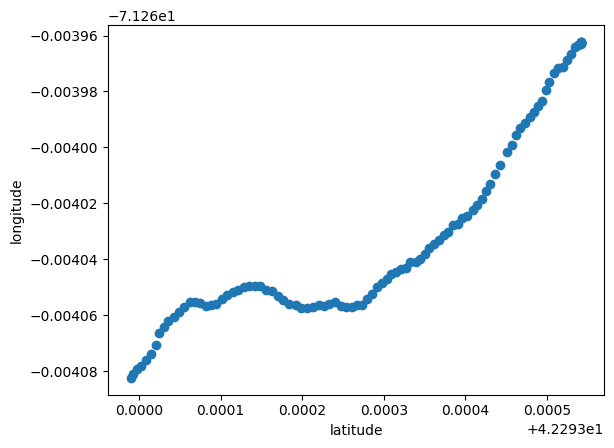

In [4]:
lat_lons = np.array(list(map(lambda x: (x['latitude'], x['longitude']), alldata['savedRouteGeospatialLocations'])))
plt.scatter(lat_lons[:,0], lat_lons[:,1])
print(lat_lons)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

[array([  0.15077506,   0.21316877,   0.23125339,   0.21042733,
         0.17721567,   0.19339687,   0.18964671,   0.18368299,
         0.11726286,  -0.21179935,  -0.70056438,  -1.18695474,
        -1.68565392,  -2.2293036 ,  -2.91850543,  -3.47784567,
        -4.00813246,  -4.51319599,  -4.97666597,  -5.51566982,
        -6.07244349,  -6.617064  ,  -7.18572617,  -7.80852032,
        -8.38895893,  -8.96337414,  -9.57671738, -10.16321659,
       -10.76999283, -11.32561588, -11.93743896, -12.48015213,
       -13.09528732, -13.67387962, -14.34418869, -15.01782322,
       -15.64738083, -16.31669044, -16.88770485, -17.55516624,
       -18.15223885, -18.82063293, -19.44370461, -20.08097267,
       -20.67080879, -21.24054146, -21.90066719, -22.49848175,
       -23.19060898, -23.80230141, -24.46477127, -25.07006645,
       -25.73002052, -26.36064911, -27.02209473, -27.68452263,
       -28.32441902, -29.02411461, -29.72878838, -30.45625114,
       -31.0968895 , -31.78771973, -32.48537827, -33.2

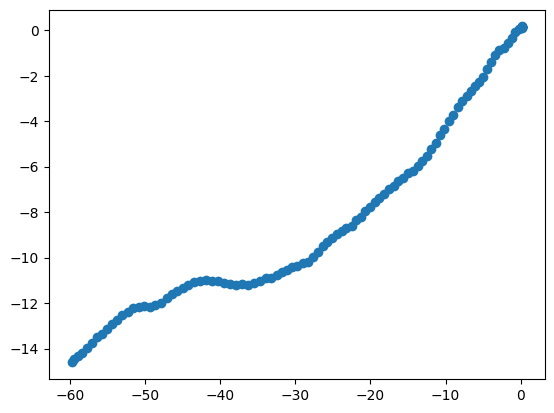

In [5]:
geoAnchorTransforms = np.array(list(map(lambda x: np.array(x['geoAnchorTransform']).reshape((4,4)), alldata['savedRouteGeospatialLocations'])))
print([geoAnchorTransforms[:,-1,0], geoAnchorTransforms[:,-1,2]])
plt.scatter(geoAnchorTransforms[:,-1,0], geoAnchorTransforms[:,-1,2])
plt.show()

## Examining GAR Anchors

These are used for alignment to the saved route.

In [6]:
from scipy.spatial.transform import Rotation as R

def get_matching_cloud_anchor(cloud_identifier):
    for anchor in alldata['cloudAnchorsForAlignment']:
        if anchor['cloudAnchorID'] == cloud_identifier:
            return np.array(anchor['anchorTransform']).reshape((4,4)).T
    return None

for anchor in alldata['garAnchors'][-3]:
    if anchor['cloudIdentifier']:
        corresponding_pose = get_matching_cloud_anchor(anchor['cloudIdentifier'])
        if corresponding_pose is None:
            continue
        current_pose = np.array(anchor['transform']).reshape((4,4)).T
        alignment_transform = current_pose @ np.linalg.inv(corresponding_pose)
        v = np.cross(alignment_transform[:-1,1], np.array([0.0, 1.0, 0.0]))
        u = v / np.linalg.norm(v)
        theta = np.arcsin(np.linalg.norm(v))
        flattened_rotation = R.from_rotvec(u*theta).as_matrix() @ alignment_transform[:-1,:-1]
        flattened_transform = np.copy(alignment_transform)
        flattened_transform[:-1, :-1] = flattened_rotation
        print("flattened", flattened_rotation)
        print("original", alignment_transform)

flattened [[ 7.22868983e-01 -2.42343423e-10  6.90985089e-01]
 [-8.44224815e-11  1.00000001e+00 -1.57212712e-10]
 [-6.90985106e-01  5.60008367e-11  7.22869006e-01]]
original [[ 7.22711519e-01  1.88893714e-02  6.90891606e-01  2.76951586e+00]
 [-1.66706667e-02  9.99812065e-01 -9.89697609e-03  4.01880766e-01]
 [-6.90948719e-01 -4.36496515e-03  7.22890608e-01  1.48817264e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## Matching Geospatial Data with GARAnchors

For each of the times we log the cloud anchors, it would be great to also have the associated latitude and longitude.  This information can be found in "garAnchorCameraWorldTransformsAndGeoSpatialData"

The code below shows the data at the last time the anchors were captured.

In [7]:
alldata['garAnchorCameraWorldTransformsAndGeoSpatialData'][-1]

{'geospatialTransform': {'altitude': 30.973579423502088,
  'altitudeAccuracy': 0.41175201558642865,
  'heading': 197.92583552075735,
  'latitude': 42.2929962996853,
  'positionAccuracy': 0.6863294836890871,
  'headingAccuracy': 1.69094893235862,
  'longitude': -71.2640707053369},
 'cameraWorldTransform': [0.23954954743385315,
  -0.9656744599342346,
  -0.10044191032648087,
  0,
  -0.35915231704711914,
  0.007975890301167965,
  -0.9332447648048401,
  0,
  0.9020118713378906,
  0.2596323490142822,
  -0.34491363167762756,
  0,
  -49.58527755737305,
  0.5527532696723938,
  45.4322509765625,
  0.9999998807907104]}